<a href="https://colab.research.google.com/github/SajidNouval/Machine-Learning/blob/main/SajidNouval_24060122140110_LenseDataset3_ipynb_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sajid Nouval
24060122140110
Lense Dataset
https://archive.ics.uci.edu/dataset/58/lenses**


In [ ]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data"
names = ['Age', 'Spectacle Prescription', 'Astigmatism', 'Tear Production Rate', 'Class']
dataset = pd.read_csv(url, names=names, delim_whitespace=True)

<ipython-input-1-aa61490c04a3>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = pd.read_csv(url, names=names, delim_whitespace=True)


In [ ]:
print(dataset.head(10))

    Age  Spectacle Prescription  Astigmatism  Tear Production Rate  Class
1     1                       1            1                     1      3
2     1                       1            1                     2      2
3     1                       1            2                     1      3
4     1                       1            2                     2      1
5     1                       2            1                     1      3
6     1                       2            1                     2      2
7     1                       2            2                     1      3
8     1                       2            2                     2      1
9     2                       1            1                     1      3
10    2                       1            1                     2      2


In [9]:
print ("Lense Before: ", dataset.size)
dataset[['Age', 'Spectacle Prescription', 'Astigmatism', 'Tear Production Rate', 'Class']].describe()
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
print ("Lense After: ", dataset.size)
dataset.head(5)

Lense Before:  120
Lense After:  120


,Age,Spectacle Prescription,Astigmatism,Tear Production Rate,Class
0,1,1,1,1,3
1,1,1,1,2,2
2,1,1,2,1,3
3,1,1,2,2,1
4,1,2,1,1,3


In [10]:
featureset = dataset[['Age', 'Spectacle Prescription', 'Astigmatism', 'Tear Production Rate', 'Class']]

from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 1. , 0.5],
       [0. , 0. , 1. , 0. , 1. ],
       [0. , 0. , 1. , 1. , 0. ],
       [0. , 1. , 0. , 0. , 1. ]])

In [11]:
# Clustering with Scipy

import numpy as np
from scipy.spatial.distance import euclidean

leng = feature_mtx.shape[0]
D = np.zeros((leng, leng))  # Use numpy's zeros for initialization

for i in range(leng):
    for j in range(leng):
        D[i, j] = euclidean(feature_mtx[i], feature_mtx[j])  # Use scipy's euclidean function

import pylab
import scipy.cluster.hierarchy

In [12]:
X = hierarchy.linkage(D, 'single')

<ipython-input-12-b6f6c2f2fae1>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')


In [13]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(X, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [14]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(X, k, criterion='maxclust')
clusters

array([3, 3, 4, 1, 2, 3, 5, 1, 3, 3, 4, 1, 2, 3, 5, 5, 3, 3, 4, 1, 2, 3,
       5, 5], dtype=int32)

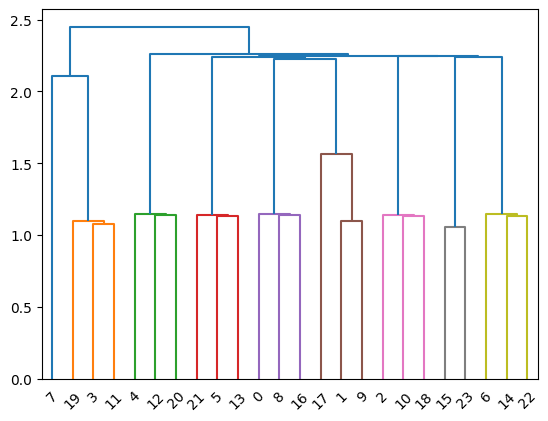

In [15]:
dendro = hierarchy.dendrogram(X)

In [16]:
Y = hierarchy.linkage(D, 'average')

<ipython-input-16-e98446c99915>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')


In [17]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Y, max_d, criterion='distance')
clusters

array([1, 4, 1, 3, 2, 4, 2, 3, 1, 4, 1, 3, 2, 4, 2, 2, 1, 4, 1, 3, 2, 4,
       2, 2], dtype=int32)

In [18]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Y, k, criterion='maxclust')
clusters

array([1, 5, 1, 4, 2, 5, 3, 4, 1, 5, 1, 4, 2, 5, 3, 3, 1, 5, 1, 4, 2, 5,
       3, 3], dtype=int32)

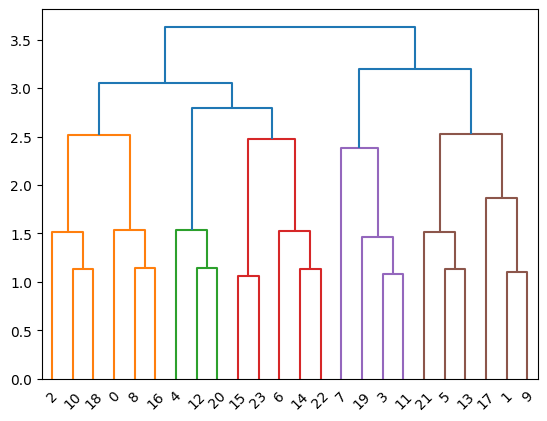

In [19]:
dendro = hierarchy.dendrogram(Y)

In [20]:
# Clustering dengan Scikit-Learn

dist_matrix = distance_matrix(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         1.11803399 1.         1.73205081 1.         1.5
  1.41421356 2.         0.5        1.22474487 1.11803399 1.80277564
  1.11803399 1.58113883 1.5        1.80277564 1.         1.41421356
  1.41421356 2.         1.41421356 1.80277564 1.73205081 2.        ]
 [1.11803399 0.         1.5        1.11803399 1.5        1.
  1.80277564 1.5        1.22474487 0.5        1.58113883 1.22474487
  1.58113883 1.11803399 1.87082869 1.58113883 1.5        1.11803399
  1.80277564 1.5        1.80277564 1.41421356 2.06155281 1.80277564]
 [1.         1.5        0.         1.41421356 1.41421356 1.80277564
  1.         1.73205081 1.11803399 1.58113883 0.5        1.5
  1.5        1.87082869 1.11803399 1.5        1.41421356 1.73205081
  1.         1.73205081 1.73205081 2.06155281 1.41421356 1.73205081]
 [1.73205081 1.11803399 1.41421356 0.         2.         1.5
  1.73205081 1.         1.80277564 1.22474487 1.5        0.5
  2.06155281 1.58113883 1.80277564 1.5        2.         1.73205081
  1.73205081 

In [21]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'single')
agglom.fit(feature_mtx)

AgglomerativeClustering(linkage='single', n_clusters=6)

In [22]:
print(agglom.labels_)

[0 1 0 2 0 4 0 3 0 1 0 2 0 4 0 5 0 1 0 2 0 4 0 5]


In [23]:
dataset['cluster_'] = agglom.labels_
dataset.head()

,Age,Spectacle Prescription,Astigmatism,Tear Production Rate,Class,cluster_
0,1,1,1,1,3,0
1,1,1,1,2,2,1
2,1,1,2,1,3,0
3,1,1,2,2,1,2
4,1,2,1,1,3,0


In [24]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
agglom.fit(feature_mtx)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [25]:
print(agglom.labels_)

[1 2 1 0 4 5 3 0 1 2 1 0 4 5 3 3 1 2 1 0 4 5 3 3]


In [27]:
dataset['cluster_'] = agglom.labels_
dataset.head()

,Age,Spectacle Prescription,Astigmatism,Tear Production Rate,Class,cluster_
0,1,1,1,1,3,1
1,1,1,1,2,2,2
2,1,1,2,1,3,1
3,1,1,2,2,1,0
4,1,2,1,1,3,4


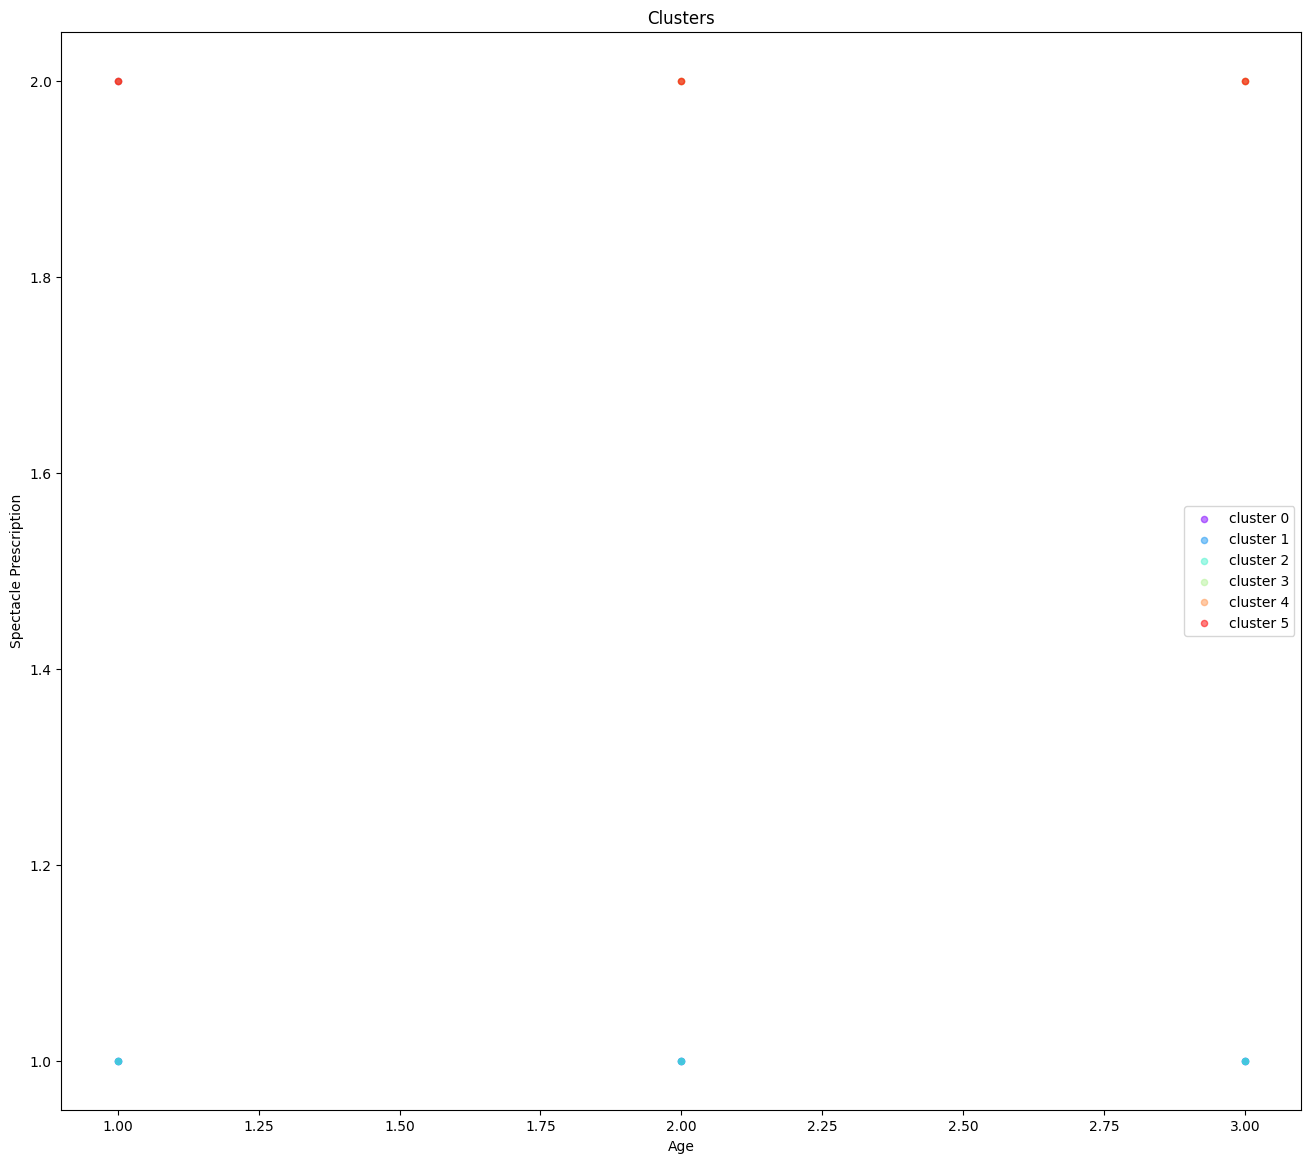

In [30]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

n_clusters = max(agglom.labels_) + 1  # Jumlah klaster
colors = cm.rainbow(np.linspace(0, 1, n_clusters))  # Warna untuk setiap klaster
cluster_labels = list(range(n_clusters))  # Label klaster

plt.figure(figsize=(16, 14))  # Ukuran plot

# Loop untuk membuat scatter plot per klaster
for color, label in zip(colors, cluster_labels):
    subset = dataset[dataset['cluster_'] == label]  # Subset data berdasarkan klaster
    # Using 'Age' and 'Spectacle Prescription' for visualization,
    # you can change to other columns as needed
    plt.scatter(subset['Age'], subset['Spectacle Prescription'], s=20, c=[color],
                label='cluster ' + str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Age')  # Changed x-axis label
plt.ylabel('Spectacle Prescription')  # Changed y-axis label
plt.show()

In [33]:
dataset.groupby(['cluster_', 'Tear Production Rate'])['cluster_'].count()

cluster_  Tear Production Rate
0         2                       4
1         1                       6
2         2                       3
3         1                       3
          2                       2
4         1                       3
5         2                       3
Name: cluster_, dtype: int64

In [35]:
agg_cars = dataset.groupby(['cluster_', 'Tear Production Rate'])[['Age', 'Spectacle Prescription', 'Astigmatism']].mean() # Change 'data' to 'dataset' and select appropriate columns for the lenses dataset
print(agg_cars)

                                Age  Spectacle Prescription  Astigmatism
cluster_ Tear Production Rate                                           
0        2                     1.75                    1.25          2.0
1        1                     2.00                    1.00          1.5
2        2                     2.00                    1.00          1.0
3        1                     2.00                    2.00          2.0
         2                     2.50                    2.00          2.0
4        1                     2.00                    2.00          1.0
5        2                     2.00                    2.00          1.0


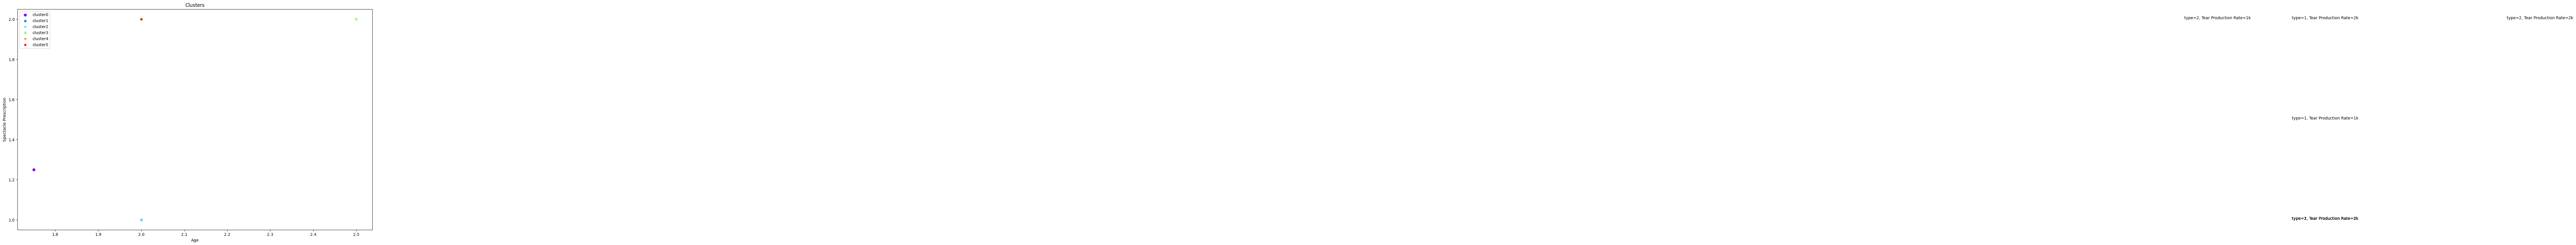

In [40]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_cars.loc[(label,),]
  for i in subset.index:
    # Accessing the columns by their names instead of index
    plt.text(subset.loc[i]['Age']+5, subset.loc[i]['Astigmatism'], 'type='+str(int(i)) + ', Tear Production Rate='+str(int(subset.loc[i]['Spectacle Prescription']))+'k')
  # Use color keyword and pass color directly
  plt.scatter(subset.Age, subset['Spectacle Prescription'], s=subset['Astigmatism']*20, color=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('Age') # Changed x-axis label
plt.ylabel('Spectacle Prescription') # Changed y-axis label
plt.show()